In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the dataset

data = pd.read_csv("/content/new_york_listings_2024.csv")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [9]:
data.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'rating',
 'bedrooms',
 'beds',
 'baths']

In [6]:
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


There is no null values / missing values in any column in the dataset.

### What is the maximum and minimum price of the properties?

In [7]:
data['price'].max()

100000.0

In [8]:
data['price'].min()

10.0

### Plot the dataset over a map

In [10]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [11]:
locations = list(zip(data.latitude, data.longitude))

locations

[(40.68371, -73.96461),
 (40.76661, -73.9881),
 (40.75076357257111, -73.99460514502687),
 (40.8356, -73.9425),
 (40.75112, -73.9786),
 (40.75995, -73.99296),
 (40.76737, -73.98787),
 (40.76519, -73.99013),
 (40.71153, -73.95312),
 (40.65891327003646, -73.9895897321432),
 (40.76068, -73.90926),
 (40.7132, -73.96176),
 (40.709993540875125, -74.00499963435044),
 (40.74347, -73.91396),
 (40.83969, -73.93861),
 (40.76176, -73.97659),
 (40.76529, -73.86361),
 (40.79283, -73.9719),
 (40.73888, -74.00343),
 (40.64304, -73.97964),
 (40.71336, -73.95495),
 (40.70477, -73.92671),
 (40.67673, -74.00194),
 (40.71446, -74.00826),
 (40.76034569999999, -73.9877968),
 (40.74376, -73.90008),
 (40.76381, -73.94959),
 (40.82859, -73.91957),
 (40.71905, -73.95937),
 (40.82378, -73.9508),
 (40.71265, -73.96539),
 (40.65442, -73.95565),
 (40.707258, -73.93397209999999),
 (40.85615, -73.9152),
 (40.75972, -73.81527),
 (40.75408, -73.97071),
 (40.76366, -73.86133),
 (40.73626, -73.95634),
 (40.75282, -73.97315

In [12]:
map1 = folium.Map(location=[40.8, - 73.8], zoom_start=9)

FastMarkerCluster(data=locations).add_to(map1)

map1

Scatterplot to show the neighbourhood group based on Latitude and Longitude

In [13]:
data['neighbourhood_group']

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Manhattan
4,Manhattan
...,...
20753,Manhattan
20754,Manhattan
20755,Manhattan
20756,Manhattan


In [14]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

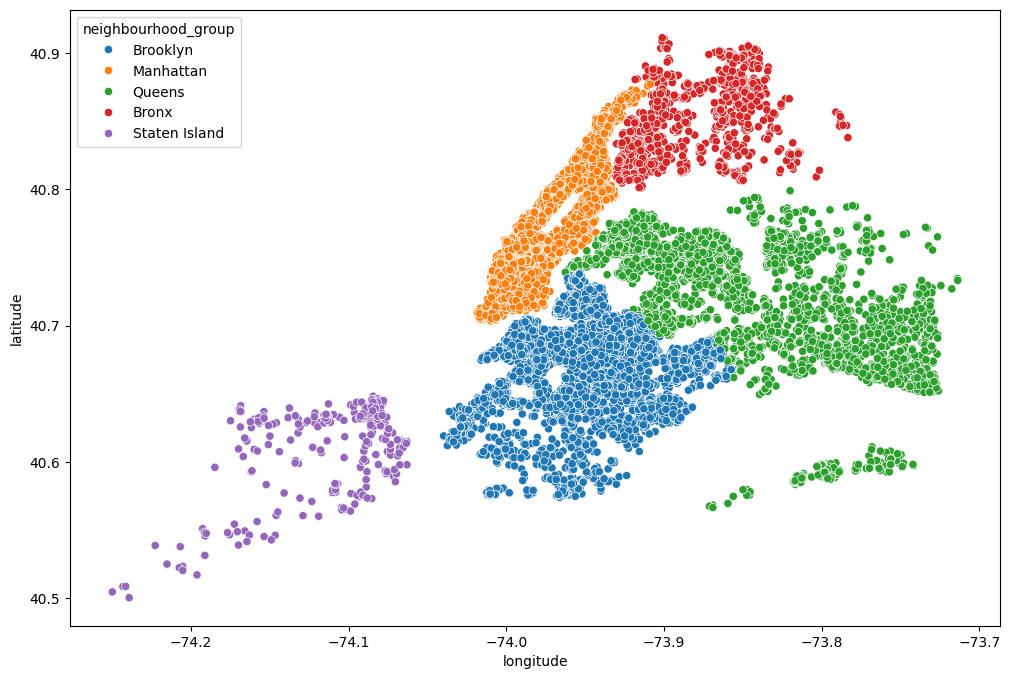

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.neighbourhood_group)
plt.show()

In [18]:
data[['neighbourhood', 'neighbourhood_group']]

,neighbourhood,neighbourhood_group
0,Clinton Hill,Brooklyn
1,Hell's Kitchen,Manhattan
2,Chelsea,Manhattan
3,Washington Heights,Manhattan
4,Murray Hill,Manhattan
...,...,...
20753,Lower East Side,Manhattan
20754,Greenwich Village,Manhattan
20755,Hell's Kitchen,Manhattan
20756,Chinatown,Manhattan


How many different neighbourhoods are there in each neighbourhood_group?

In [22]:
data[['neighbourhood', 'neighbourhood_group']].groupby('neighbourhood_group').nunique()

,neighbourhood
neighbourhood_group,
Bronx,48
Brooklyn,48
Manhattan,32
Queens,51
Staten Island,42


Find the count of the properties in each neighbourhood groups

In [25]:
data[['id', 'neighbourhood_group']].groupby('neighbourhood_group').count()

,id
neighbourhood_group,
Bronx,949
Brooklyn,7719
Manhattan,8038
Queens,3761
Staten Island,291


In [26]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

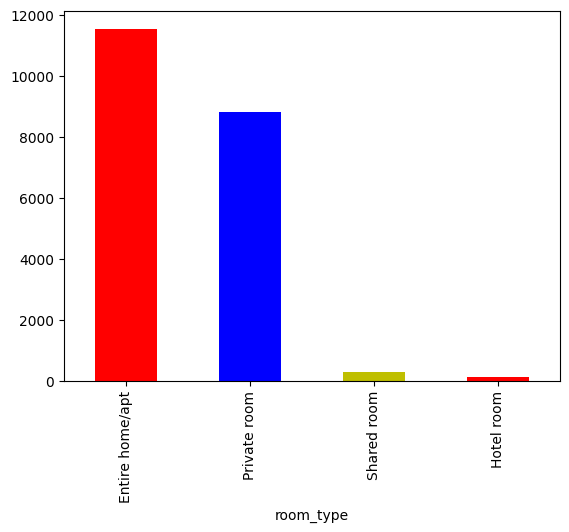

In [28]:
data['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

plt.show()

In [32]:
data[['neighbourhood_group','room_type']].groupby(['room_type','neighbourhood_group']).value_counts()

room_type        neighbourhood_group
Entire home/apt  Bronx                   390
                 Brooklyn               4129
                 Manhattan              5288
                 Queens                 1586
                 Staten Island           156
Hotel room       Brooklyn                  4
                 Manhattan               101
                 Queens                    7
Private room     Bronx                   544
                 Brooklyn               3464
                 Manhattan              2572
                 Queens                 2093
                 Staten Island           131
Shared room      Bronx                    15
                 Brooklyn                122
                 Manhattan                77
                 Queens                   75
                 Staten Island             4
Name: count, dtype: int64

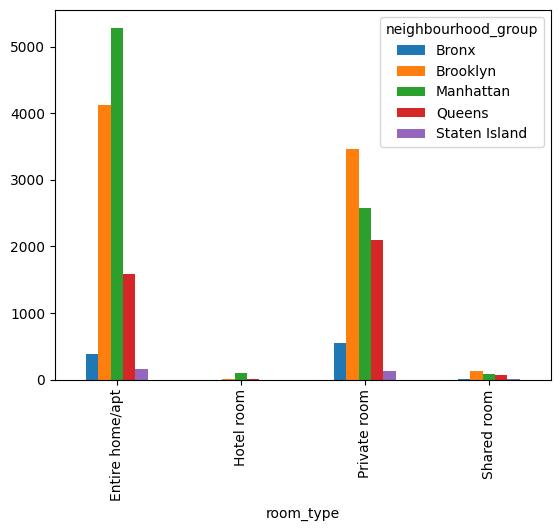

In [35]:
df = data[['neighbourhood_group','room_type']].groupby(['room_type','neighbourhood_group']).value_counts()

df.unstack().plot.bar()

plt.show()

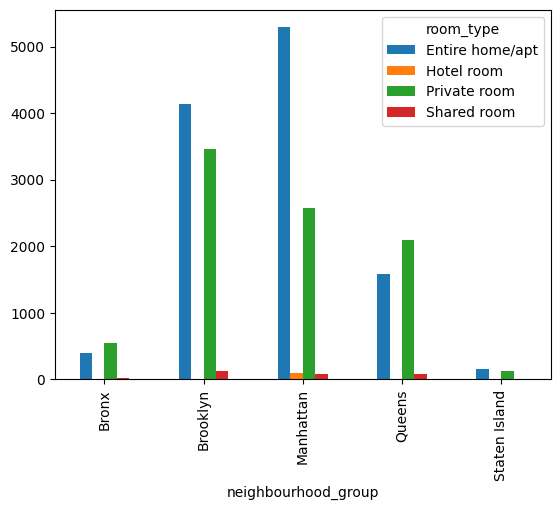

In [36]:
df = data[['neighbourhood_group','room_type']].groupby(['neighbourhood_group','room_type']).value_counts()

df.unstack().plot.bar()

plt.show()

Find out the host who has highest number of apartment listed

In [37]:
apt = data[data['room_type']=='Entire home/apt']

list_apt = apt.groupby(['host_id', 'host_name', 'neighbourhood', 'neighbourhood_group']).size()\
              .reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)

list_apt.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,apartment
3753,51501835,Jeniffer,Hell's Kitchen,Manhattan,75
5269,162280872,Urban Furnished,Upper East Side,Manhattan,64
4806,120762452,Stanley,Murray Hill,Manhattan,61
2807,23772724,The Local Stay,Upper East Side,Manhattan,46
7139,423873487,Shoreham,Midtown,Manhattan,43
3962,61391963,Stay With Vibe,Upper East Side,Manhattan,36
3957,61391963,Stay With Vibe,Kips Bay,Manhattan,35
6810,385129361,Central Park Apartments,Upper West Side,Manhattan,34
2174,13347167,AFI Apartments,Upper East Side,Manhattan,31
6182,278925199,Paradise Suites,Upper East Side,Manhattan,28


In [39]:
jeniffer_data = data[data['host_name'] == 'Jeniffer']

jeniffer_data[['host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude']].head(10)

,host_id,host_name,neighbourhood,latitude,longitude
1,51501835,Jeniffer,Hell's Kitchen,40.76661,-73.98810
5,51501835,Jeniffer,Hell's Kitchen,40.75995,-73.99296
6,51501835,Jeniffer,Hell's Kitchen,40.76737,-73.98787
7,51501835,Jeniffer,Hell's Kitchen,40.76519,-73.99013
155,51501835,Jeniffer,Upper East Side,40.78225,-73.95408
156,51501835,Jeniffer,Upper East Side,40.78118,-73.95306
169,51501835,Jeniffer,Upper East Side,40.78213,-73.95269
521,51501835,Jeniffer,Lower East Side,40.72025,-73.99380
534,51501835,Jeniffer,Little Italy,40.71899,-73.99773
570,51501835,Jeniffer,Hell's Kitchen,40.76411,-73.99371


Find out the host who has highest number of private room listed

In [41]:
pvtroom = data[data['room_type']=='Private room']

list_pvt_room = pvtroom.groupby(['host_id', 'host_name', 'neighbourhood', 'neighbourhood_group']).size()\
                       .reset_index(name='pvt_room').sort_values(by=['pvt_room'],ascending=False)

list_pvt_room.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,pvt_room
4550,401202937,Eliza,Midtown,Manhattan,51
5107,484277630,Bugra Han,Midtown,Manhattan,31
5357,520207720,Shkedy,Midtown,Manhattan,27
3211,163362268,Reservation Desk,Gramercy,Manhattan,24
3462,200239515,Shogo,Woodside,Queens,24
2990,137358866,Kaz,Woodside,Queens,24
535,3223938,Eugene,Bushwick,Brooklyn,23
4753,435938215,Hudson River,Hell's Kitchen,Manhattan,23
3266,171697479,Aamer,Midtown,Manhattan,18
4434,381698920,Hudson,Hell's Kitchen,Manhattan,18


### Price exploration

In different neighbourhood groups find out
1. minimum property price
2. maximum property price
3. minimum property price for different room_types
4. maximum property price for different room_types

In [42]:
data[['neighbourhood_group', 'price']].groupby('neighbourhood_group').agg(['min', 'max'])

price          
                      min       max
neighbourhood_group                
Bronx                24.0    9994.0
Brooklyn             10.0  100000.0
Manhattan            10.0   10000.0
Queens               17.0   10000.0
Staten Island        33.0    1000.0

In [43]:
data[['neighbourhood_group', 'room_type', 'price']].groupby(['neighbourhood_group','room_type']).agg(['min', 'max'])

price          
                                       min       max
neighbourhood_group room_type                       
Bronx               Entire home/apt   50.0     585.0
                    Private room      25.0    9994.0
                    Shared room       24.0     310.0
Brooklyn            Entire home/apt   10.0    7498.0
                    Hotel room       135.0     172.0
                    Private room      10.0  100000.0
                    Shared room       18.0     500.0
Manhattan           Entire home/apt   10.0   10000.0
                    Hotel room        80.0    7590.0
                    Private room      10.0   10000.0
                    Shared room       14.0   10000.0
Queens              Entire home/apt   33.0   10000.0
                    Hotel room       139.0     203.0
                    Private room      17.0     782.0
                    Shared room       26.0     313.0
Staten Island       Entire home/apt   39.0     559.0
                    Private room      33.0    1000.0
                    Shared room      129.0     220.0

In [44]:
# The property where the price is >= 10000$

ultra_high_value_properties = data[data['price']>=10000]

ultra_high_value_properties.shape

(8, 22)

In [47]:
ultra_high_value_properties[['id', 'host_name', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'price', 'room_type']].sort_values('price', ascending=False)

,id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,price,room_type
3990,17160286,Bobbi,Bedford-Stuyvesant,Brooklyn,40.69085,-73.93806,100000.0,Private room
5492,605115521796576121,Bobbi,Bedford-Stuyvesant,Brooklyn,40.69254,-73.93636,100000.0,Private room
901,38993679,The Gregory Hotel,Midtown,Manhattan,40.75088,-73.98644,10000.0,Private room
2952,13925864,Sarah,Long Island City,Queens,40.76128,-73.93141,10000.0,Entire home/apt
3026,31219800,Rom,Murray Hill,Manhattan,40.74931,-73.97830,10000.0,Shared room
3140,38993493,The Gregory Hotel,Midtown,Manhattan,40.74924,-73.98722,10000.0,Private room
4528,38993556,The Gregory Hotel,Midtown,Manhattan,40.74863,-73.98493,10000.0,Private room
6874,52862058,Chris,Financial District,Manhattan,40.70641,-74.00920,10000.0,Entire home/apt


Find
1. The average price of the property in different neighbourhood gorup
2. The average prcie of the property in differnt neighbourhood group and for different room type

In [48]:
data[['neighbourhood_group', 'price']].groupby('neighbourhood_group').agg(['min', 'max', 'mean'])

price                      
                      min       max        mean
neighbourhood_group                            
Bronx                24.0    9994.0  118.407798
Brooklyn             10.0  100000.0  187.033942
Manhattan            10.0   10000.0  227.854193
Queens               17.0   10000.0  126.489232
Staten Island        33.0    1000.0  118.780069

In [49]:
data[['neighbourhood_group', 'room_type', 'price']].groupby(['neighbourhood_group','room_type']).agg(['min', 'max', 'mean'])

price                      
                                       min       max        mean
neighbourhood_group room_type                                   
Bronx               Entire home/apt   50.0     585.0  149.043590
                    Private room      25.0    9994.0   97.301471
                    Shared room       24.0     310.0   87.333333
Brooklyn            Entire home/apt   10.0    7498.0  210.741342
                    Hotel room       135.0     172.0  162.750000
                    Private room      10.0  100000.0  161.658776
                    Shared room       18.0     500.0  105.959016
Manhattan           Entire home/apt   10.0   10000.0  253.747352
                    Hotel room        80.0    7590.0  442.326733
                    Private room      10.0   10000.0  163.450622
                    Shared room       14.0   10000.0  319.558442
Queens              Entire home/apt   33.0   10000.0  179.928752
                    Hotel room       139.0     203.0  165.714286
                    Private room      17.0     782.0   87.384138
                    Shared room       26.0     313.0   84.053333
Staten Island       Entire home/apt   39.0     559.0  139.852564
                    Private room      33.0    1000.0   92.389313
                    Shared room      129.0     220.0  161.250000

### Rating exploration

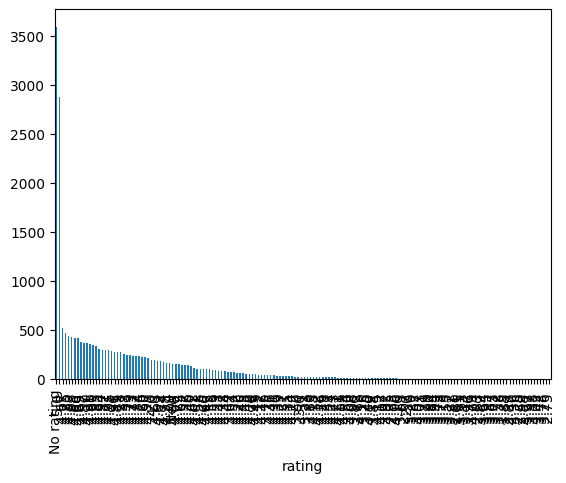

In [51]:
data['rating'].value_counts().plot(kind='bar')
plt.show()

In [52]:
data['rating']

,rating
0,5.0
1,4.67
2,4.17
3,4.64
4,4.91
...,...
20753,4.75
20754,4.46
20755,4.93
20756,5.0


In [53]:
data['rating'].min(), data['rating'].max()

('1.75 ', 'No rating')

How many properties are there with no rating

In [56]:
data[data['rating']=='No rating'].shape

(3593, 22)

How many properties are there where the rating is more than 4.0

In [64]:
df = data[data['rating'] != 'No rating']

df[df['rating'].astype('float') > 4.0].shape

ValueError: could not convert string to float: 'New '

In [66]:
df['rating'].value_counts()

,count
rating,
5.0,2882
4.67,517
4.75,469
4.80,439
4.83,426
...,...
4.02,1
3.42,1
3.73,1


In [76]:
count = 0

for i in range(len(data)):
    try:
        v = float(data.loc[i,'rating'])
    except:
        pass
    else:
        if v > 4.5:
            count += 1

In [77]:
count

14258

In [75]:
data.shape

(20758, 22)